# Sephora Data

This Sephora dataset contains the product name, brand, description, ingredients, category, average rating, price and reviewer's skin type. Using the list of potentially hazardous chemicals found in the California Safe Cosmetics Program (CSCP) dataset, Sephora brands were separated into toxic and nontoxic chemicals. These brands were also categorized as Western, Japanese, or Korean.

In [480]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('cosmetic.csv')

**Data Cleaning**

In [481]:
#classify brand names as Korean/Western
korean_brands = ['LANEIGE', 'AMOREPACIFIC', 'DR. JART+', 'GLOW RECIPE', 'TOO COOL FOR SCHOOL', 'SON & PARK', 'J. ONE']
japanese_brands = ['TATCHA', 'SK-II', 'KOH GEN DO']
df['Classification'] = ['KOREAN' if val in korean_brands else 'JAPANESE' if val in japanese_brands else 'WESTERN' for val in df['brand']]
# df2 = df.drop(columns=['Korean/Western'])
# df2.head()
df.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients,Classification
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",WESTERN
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",JAPANESE
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,WESTERN
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",WESTERN
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,WESTERN


Create a list based on the hazardous chemicals found from CSCP dataset and create new column showing whether or not those toxic ingredients are found in the ingredients list on the Sephora dataset

In [482]:
#search for the number of products that contain chemicals in chemical list
df['ingredients_final'] = df['ingredients']
chemical_list = ['Titanium Dioxide',
                 'Benzophenone',
                 'Ginkgo Biloba Extract',
                 'Coffee',
                 'Aloe Vera, Whole Leaf Extract',
                 'Caffeic Acid',
                 'Butylated Hydroxyanisole',
                 'Acetaldehyde',
                 'Benzo[A]Pyrene',
                 'Benz[A]Anthracene',
                 'Estragole',
                 'Safrole']

#create new chemical column that classifies brands that contain hazardous chemicals
df['Chem?'] = df['ingredients'].str.contains('|'.join(chemical_list))

#check if there are any null values
df['ingredients'].isnull().values.any()
#drop NA values
df2 = df.dropna()
df2.reset_index()
df2.head()

,Label,URL,brand,name,price,rank,skin_type,ingredients,Classification,ingredients_final,Chem?
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",WESTERN,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",False
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",JAPANESE,"-Pitera™: A bio-ingredient rich in vitamins, o...",False
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,WESTERN,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,False
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",WESTERN,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",False
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,WESTERN,-Collagen: Supports skin elasticity for a yout...,False


Create a function to help categorize each brand with a hazardous chemical. The function will take values in a newly created column with a values from the chemical_list. For example, if Titanium Dioxide and Coffee are found in a cell under the new column, then the cell will only contain Titanium Dioxide and Coffee.

In [483]:
#replace values in the ingredients_final column with values from the chemical_list
for index,row in df2.iterrows():
    if row.str.contains('Titanium Dioxide', na=False).any():
        df.loc[index, 'ingredients_final'] = 'Titanium Dioxide'

In [484]:
#create temporary dataframe to test function
tempdf = df.head()
tempdf['Category'] = tempdf['ingredients']
tempdf

/Users/seanleong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Label,URL,brand,name,price,rank,skin_type,ingredients,Classification,ingredients_final,Chem?,Category
0,moisturizing-cream-oils-mists,https://www.sephora.com/product/creme-de-la-me...,LA MER,Crème de la Mer,$175.00,4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Mineral Oil, Petrolat...",WESTERN,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",False,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,moisturizing-cream-oils-mists,https://www.sephora.com/product/facial-treatme...,SK-II,Facial Treatment Essence,$179.00\n($214.00 value),4.1,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","-Pitera™: A bio-ingredient rich in vitamins, o...",JAPANESE,"-Pitera™: A bio-ingredient rich in vitamins, o...",False,"-Pitera™: A bio-ingredient rich in vitamins, o..."
2,moisturizing-cream-oils-mists,https://www.sephora.com/product/protini-tm-pol...,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,4.4,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...",-9 Signal Peptide Complex \n-Pygmy Waterlily S...,WESTERN,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,False,-9 Signal Peptide Complex \n-Pygmy Waterlily S...
3,moisturizing-cream-oils-mists,https://www.sephora.com/product/the-moisturizi...,LA MER,The Moisturizing Soft Cream,$175.00,3.8,"['✔ Normal\n', '✔ Oily\n', '✔ Combination\n', ...","Algae (Seaweed) Extract, Cyclopentasiloxane, P...",WESTERN,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",False,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,moisturizing-cream-oils-mists,https://www.sephora.com/product/your-skin-but-...,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,4.1,"['✔ Full\n', '✔ Sensitive\n', '✔ Normal\n', '✔...",-Collagen: Supports skin elasticity for a yout...,WESTERN,-Collagen: Supports skin elasticity for a yout...,False,-Collagen: Supports skin elasticity for a yout...


In [485]:
#create function that replaces substring with string
def replace_values(series, lst=chemical_list):
    set_list = set(lst)
    str_list = set(series.split(', '))
    
    return list(set_list.intersection(str_list))

#test function
replace_values(tempdf['ingredients'].iloc[0], ['Mineral Oil'])

['Mineral Oil']

In [486]:
#create new column
df2['Category'] = df2['ingredients'].apply(replace_values)

/Users/seanleong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Tables and Graphs**

In [565]:
#create table with population of concern
sephora_df = df2[['Label', 'brand', 'name', 'rank', 'Chem?', 'Classification']]
sephora_df = sephora_df.rename(columns={'name':'# of Products', 'Chem?': 'Toxic', 'rank': 'Avg Stars'})

#create df that does not contain Japanese products
sephora_df_comp = sephora_df[sephora_df['Classification'] != 'JAPANESE']
sephora_df_comp.head()

,Label,brand,# of Products,Avg Stars,Toxic,Classification
0,moisturizing-cream-oils-mists,LA MER,Crème de la Mer,4.1,False,WESTERN
2,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Protini™ Polypeptide Cream,4.4,False,WESTERN
3,moisturizing-cream-oils-mists,LA MER,The Moisturizing Soft Cream,3.8,False,WESTERN
4,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,4.1,False,WESTERN
6,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,4.2,False,WESTERN


Created a table and graph that shows a high level summary of the breakout of the numbers of brands that contain toxic and nontoxic ingredients

In [566]:
#group by Classification, Chem and count products
groups = sephora_df_comp.groupby(['Classification', 'Toxic']).nunique('name')
sephora_df_comp = groups

sephora_df_count = sephora_df_comp[['# of Products']]
sephora_df_count = sephora_df_count.sort_values(by=['# of Products'], ascending=False)
sephora_df_count.reset_index()

,Classification,Toxic,# of Products
0,WESTERN,False,1004
1,WESTERN,True,338
2,KOREAN,False,73
3,KOREAN,True,20


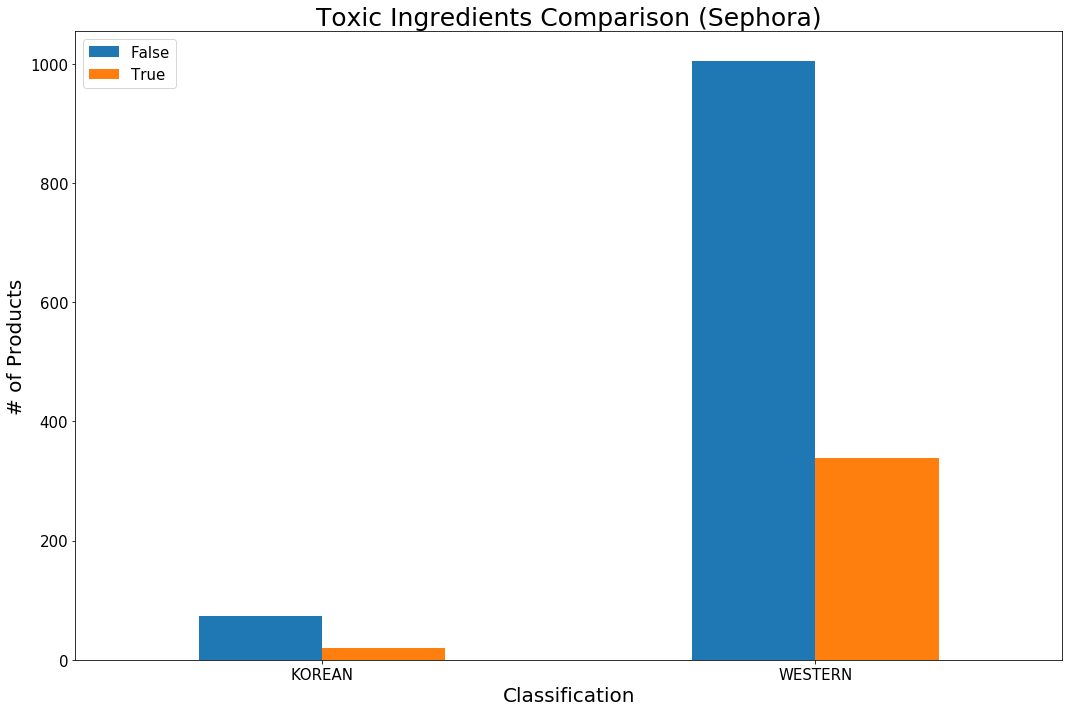

In [571]:
#Plot datapoints
ax = sephora_df_count.groupby(['Classification', 'Toxic']).sum()['# of Products'].unstack().plot(kind='bar', stacked=False, figsize=[15,10])
ax.set_xlabel('Classification', fontsize=20)
ax.set_ylabel('# of Products', fontsize=20)
ax.set_title('Toxic Ingredients Comparison (Sephora)', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()

Created a table and graph that shows the number of products that contain toxic/nontoxic ingredients across average stars given by reviewers

In [572]:
#create table
sephora_df2 = df2[['Label', 'brand', 'name', 'rank', 'Chem?', 'Classification']]
sephora_df2 = sephora_df2.rename(columns={'name':'# of Products', 'Chem?': 'Toxic', 'rank': 'Avg Stars'})


sephora_df2_comp = sephora_df2[sephora_df2['Classification'] != 'JAPANESE']
sephora_df2_comp.head()

,Label,brand,# of Products,Avg Stars,Toxic,Classification
0,moisturizing-cream-oils-mists,LA MER,Crème de la Mer,4.1,False,WESTERN
2,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Protini™ Polypeptide Cream,4.4,False,WESTERN
3,moisturizing-cream-oils-mists,LA MER,The Moisturizing Soft Cream,3.8,False,WESTERN
4,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,4.1,False,WESTERN
6,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,4.2,False,WESTERN


In [573]:
# group by rank, classifciation, count brand
groups4 = sephora_df2_comp.groupby(['Avg Stars', 'Toxic', 'Classification']).nunique('name')
sephora_df4_groups = groups4

sephora_df4_count = sephora_df4_groups[['# of Products']]
sephora_df4_count = sephora_df4_count.sort_values(by=['# of Products'], ascending=False)
sephora_df4_count.reset_index().head()

,Avg Stars,Toxic,Classification,# of Products
0,4.4,False,WESTERN,132
1,4.3,False,WESTERN,129
2,4.5,False,WESTERN,105
3,4.1,False,WESTERN,99
4,4.2,False,WESTERN,99


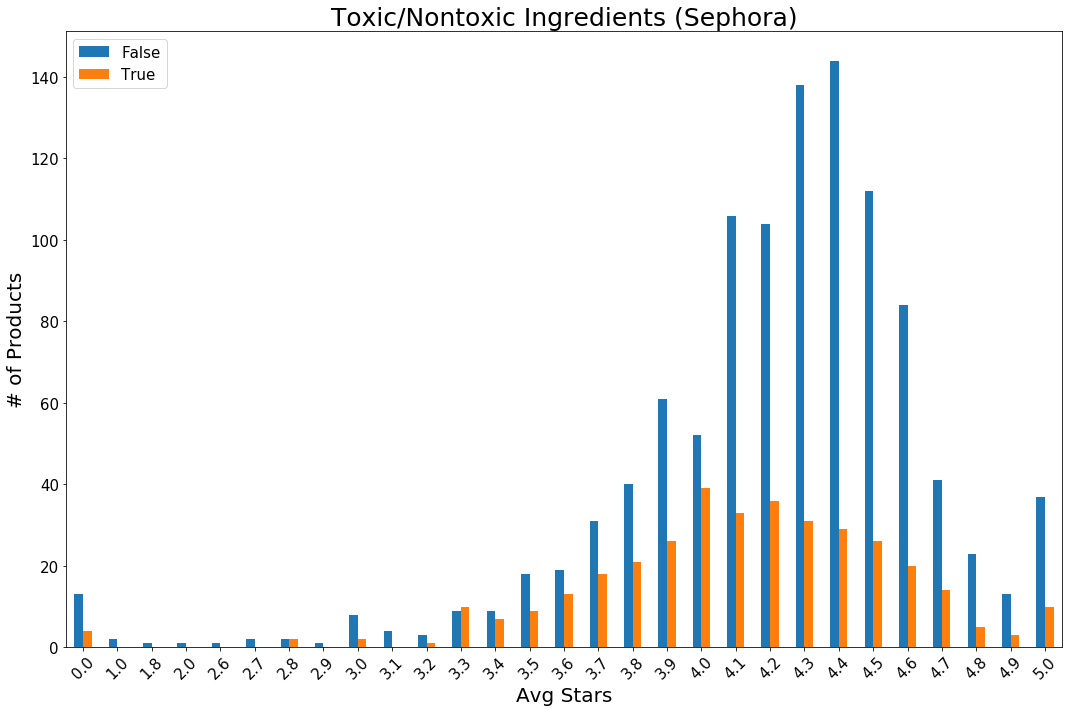

In [574]:
#Plot datapoints
ax = sephora_df4_count.groupby(['Avg Stars', 'Toxic']).sum()['# of Products'].unstack().plot(kind='bar', stacked=False, figsize=[15,10])
ax.set_xlabel('Avg Stars', fontsize=20)
ax.set_ylabel('# of Products', fontsize=20)
ax.set_title('Toxic/Nontoxic Ingredients (Sephora)', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

Created a table and graph that shows the number of Korean and Western products that contain toxic ingredients across average stars given by reviewers

In [575]:
#dataframe with nontoxic chemicals
sephora_df2_nochems = sephora_df2_comp[sephora_df2['Toxic'] == True]

/Users/seanleong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [578]:
# group by rank, classifciation, count brand
groups2 = sephora_df2_nochems.groupby(['Avg Stars', 'Classification']).nunique('name')
sephora_df2_groups = groups2
# sephora_df2_groups

# sephora_df2_groups = sephora_df2_groups.rename(columns={'name': '# of Products'})
sephora_df2_count = sephora_df2_groups[['# of Products']]
sephora_df2_count = sephora_df2_count.sort_values(by=['# of Products'], ascending=False)
sephora_df2_count.reset_index().head()

,Avg Stars,Classification,# of Products
0,4.0,WESTERN,35
1,4.2,WESTERN,31
2,4.1,WESTERN,30
3,4.3,WESTERN,29
4,4.4,WESTERN,28


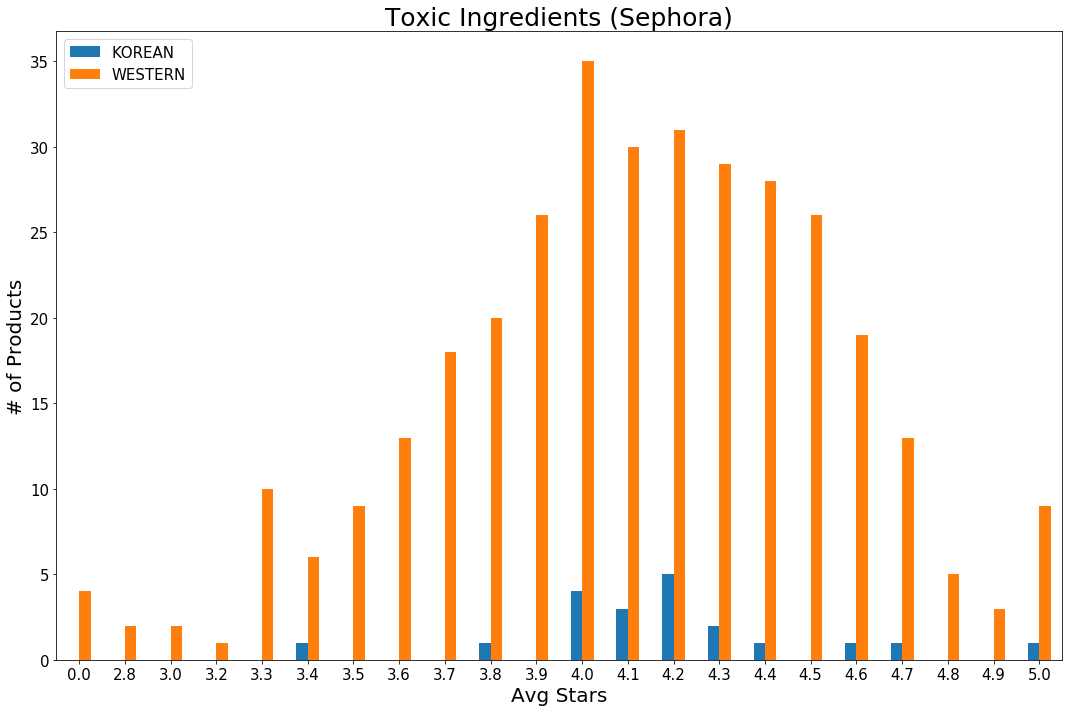

In [585]:
#Plot datapoints
ax = sephora_df2_count.groupby(['Avg Stars', 'Classification']).sum()['# of Products'].unstack().plot(kind='bar', stacked=False, figsize=[15,10])
ax.set_xlabel('Avg Stars', fontsize=20)
ax.set_ylabel('# of Products', fontsize=20)
ax.set_title('Toxic Ingredients (Sephora)', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()

Created a table and graph that shows the number of Korean and Western products that contain nontoxic ingredients across average stars given by reviewers

In [581]:
#dataframe containing toxic chemicals
sephora_df3_chems = sephora_df2_comp[sephora_df2_comp['Toxic'] == False]
sephora_df3_chems.head()

,Label,brand,# of Products,Avg Stars,Toxic,Classification
0,moisturizing-cream-oils-mists,LA MER,Crème de la Mer,4.1,False,WESTERN
2,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Protini™ Polypeptide Cream,4.4,False,WESTERN
3,moisturizing-cream-oils-mists,LA MER,The Moisturizing Soft Cream,3.8,False,WESTERN
4,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,4.1,False,WESTERN
6,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,4.2,False,WESTERN


In [586]:
# group by rank, classifciation, count brand
groups3 = sephora_df3_chems.groupby(['Avg Stars', 'Classification']).nunique('name')
sephora_df3_groups = groups3
sephora_df3_groups

# sephora_df3_groups = sephora_df3_groups.rename(columns={'name': '# of Products'})
sephora_df3_count = sephora_df3_groups[['# of Products']]
sephora_df3_count = sephora_df3_count.sort_values(by=['# of Products'], ascending=False)
sephora_df3_count.reset_index().head()

,Avg Stars,Classification,# of Products
0,4.4,WESTERN,132
1,4.3,WESTERN,129
2,4.5,WESTERN,105
3,4.2,WESTERN,99
4,4.1,WESTERN,99


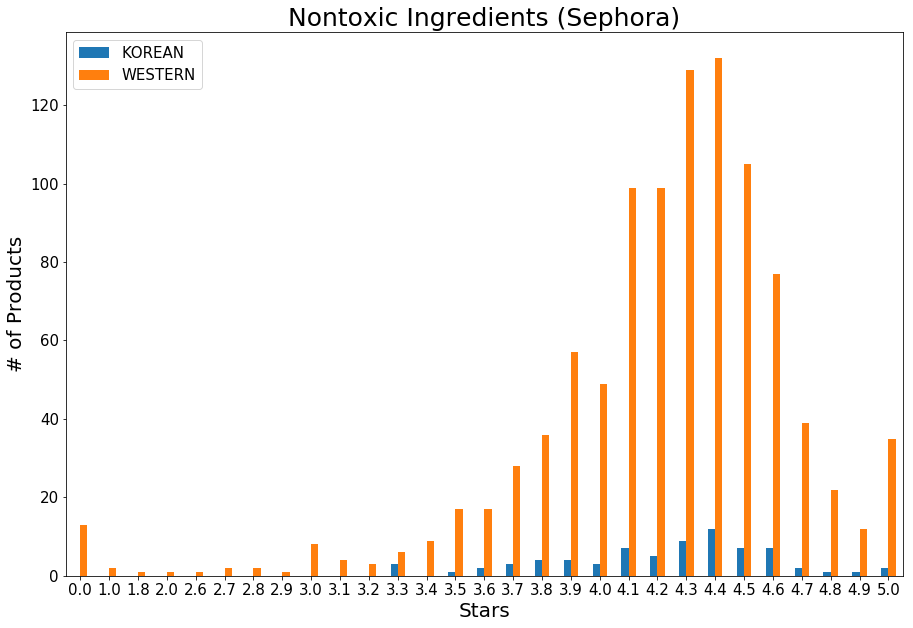

In [584]:
#Plot datapoints
ax = sephora_df3_count.groupby(['Avg Stars', 'Classification']).sum()['# of Products'].unstack().plot(kind='bar', stacked=False, figsize=[15,10])
ax.set_xlabel('Stars', fontsize=20)
ax.set_ylabel('# of Products', fontsize=20)
ax.set_title('Nontoxic Ingredients (Sephora)', fontsize=25)
ax.tick_params(axis='both', labelsize=15)
ax.legend(loc='upper left', fontsize=15)
ax.tick_params(axis='x', rotation=0)